# HW 3: Model-based Bias Removal in Machine Learning using Syn- thetic Blood Pressure Data

## A. Modeling Blood Pressure as a Function of Age:

### i. Propose Mathematical Models for SBP and DBP:

After observing Fig 3 and 4, the **Sigmoidal-Gaussian Model** is chosen because it aligns well with observed blood pressure patterns across age groups:

*Biological Fit:*

- **Systolic blood pressure (SBP)** increases with age and levels off in older ages, which is well-represented by a sigmoidal curve that models rapid initial growth followed by a plateau.
- **Diastolic blood pressure (DBP)** peaks in middle age and declines, a trend that a Gaussian curve (bell shape) captures effectively.

*Interpretability and Fit:*

- The sigmoidal and Gaussian models have parameters (like peak age for DBP and maximum SBP) that match physiological trends, offering better interpretability.

### ii. Model Fitting: Use the numeric tables for the mean SBB/DBP across age in the [preprint] to fit the models above to the data points:
- Implement the models in Python or MATLAB.
- For the polynomial model, fit coefficients c1, c2, c3 for SBP and d1, d2, d3 for DBP. 
- For the sigmoidal-Gaussian model, fit Smax,k,a0 (SBP) and Dmax,apeak,σ (DBP).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score

# Age group midpoints and mean SBP/DBP values from the table
age_groups = np.array([10, 25, 35, 45, 55, 65, 75, 85, 95])
mean_sbp = np.array([115.05, 121.27, 123.79, 127.32, 129.98, 132.42, 134.62, 136.89, 138.11])
mean_dbp = np.array([69.80, 74.27, 77.31, 79.36, 79.05, 76.71, 74.06, 71.56, 69.86])

# Define Polynomial models for SBP and DBP
def polynomial_sbp(a, c1, c2, c3):
    return c1 * a**2 + c2 * a + c3

def polynomial_dbp(a, d1, d2, d3):
    return d1 * a**2 + d2 * a + d3

# Define Sigmoidal model for SBP
def sigmoidal_sbp(a, S_max, k, a_0):
    return S_max / (1 + np.exp(-k * (a - a_0)))

# Define Gaussian model for DBP
def gaussian_dbp(a, D_max, a_peak, sigma):
    return D_max * np.exp(-((a - a_peak)**2) / (2 * sigma**2))

# Fit Polynomial models for SBP and DBP
sbp_poly_params, _ = curve_fit(polynomial_sbp, age_groups, mean_sbp)
dbp_poly_params, _ = curve_fit(polynomial_dbp, age_groups, mean_dbp)

# Fit Sigmoidal and Gaussian models for SBP and DBP
# `bounds=(0, [200, 1, 100])` sets constraints on the parameters to keep them within realistic ranges:
# - `S_max` has an upper bound of 200, limiting the maximum SBP value to a realistic high point.
# - `k` is constrained to a maximum of 1, controlling the growth rate to avoid an unrealistically steep increase.
# - `a_0` is constrained to 100, ensuring the midpoint age is within a human lifespan range.
sbp_sigmoid_params, _ = curve_fit(sigmoidal_sbp, age_groups, mean_sbp, bounds=(0, [200, 1, 100]))

# Fitting the DBP (Diastolic Blood Pressure) to a Gaussian model
# `bounds=(0, [200, 100, 50])` sets realistic constraints for the Gaussian model parameters:
# - `D_max` has an upper bound of 200, limiting the peak DBP value to a plausible maximum.
# - `a_peak` has an upper bound of 100, keeping the peak age within the human lifespan.
# - `σ` has an upper bound of 50, constraining the spread of the curve to ensure DBP doesn't decline too gradually.
dbp_gaussian_params, _ = curve_fit(gaussian_dbp, age_groups, mean_dbp, bounds=(0, [200, 100, 50]))

# Generate age range for plotting and model predictions
age_range = np.linspace(10, 95, 100)
sbp_poly_fitted = polynomial_sbp(age_range, *sbp_poly_params)
dbp_poly_fitted = polynomial_dbp(age_range, *dbp_poly_params)
sbp_sigmoid_fitted = sigmoidal_sbp(age_range, *sbp_sigmoid_params)
dbp_gaussian_fitted = gaussian_dbp(age_range, *dbp_gaussian_params)

### iii. Quantitative Evaluation of Model Fit: Compute the Mean Squared Error (MSE) for each model, and calculate R-squared (R2) values to assess model fit. Plot model curves for SBP and DBP against the plots in the preprint.

In the cell below, the Polynomial and Sigmoidal-Gaussian fit are plotted against the data points for visual comparison. Then, we separate plots for SBP and DBP, allowing us to evaluate the models’ accuracy in capturing the respective trends across age groups.

Polynomial Model MSE (SBP): 0.05552277606118146
Polynomial Model MSE (DBP): 0.8238705276639481
Polynomial Model R-squared (SBP): 0.9989447467809488
Polynomial Model R-squared (DBP): 0.9322032718496756

Sigmoidal-Gaussian Model MSE (SBP): 34.04751889044024
Sigmoidal-Gaussian Model MSE (DBP): 37.26943048400714
Sigmoidal-Gaussian Model R-squared (SBP): 0.35290062099467234
Sigmoidal-Gaussian Model R-squared (DBP): -2.0669205439429095

Polynomial Model Parameters for SBP: [-1.45614098e-03  4.23820804e-01  1.11108453e+02]
Polynomial Model Parameters for DBP: [-4.99857779e-03  5.08763998e-01  6.53487295e+01]

Sigmoidal Model Parameters for SBP: [2.00000000e+02 1.01673403e-02 2.20426949e-12]
Gaussian Model Parameters for DBP: [84.58724033 52.40838264 50.        ]


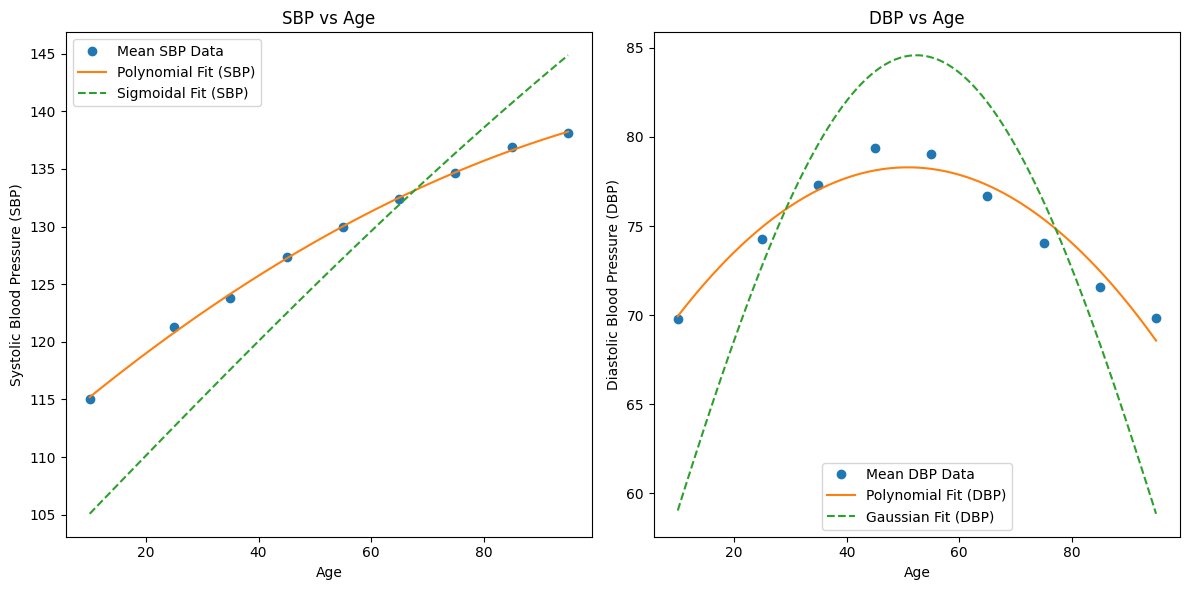

In [8]:
# Calculate MSE and R-squared for Polynomial and Sigmoidal-Gaussian models
# Polynomial Model MSE and R-squared
sbp_poly_pred = polynomial_sbp(age_groups, *sbp_poly_params)
dbp_poly_pred = polynomial_dbp(age_groups, *dbp_poly_params)
sbp_poly_mse = mean_squared_error(mean_sbp, sbp_poly_pred)
dbp_poly_mse = mean_squared_error(mean_dbp, dbp_poly_pred)
sbp_poly_r2 = r2_score(mean_sbp, sbp_poly_pred)
dbp_poly_r2 = r2_score(mean_dbp, dbp_poly_pred)

# Sigmoidal-Gaussian Model MSE and R-squared
sbp_sigmoid_pred = sigmoidal_sbp(age_groups, *sbp_sigmoid_params)
dbp_gaussian_pred = gaussian_dbp(age_groups, *dbp_gaussian_params)
sbp_sigmoid_mse = mean_squared_error(mean_sbp, sbp_sigmoid_pred)
dbp_gaussian_mse = mean_squared_error(mean_dbp, dbp_gaussian_pred)
sbp_sigmoid_r2 = r2_score(mean_sbp, sbp_sigmoid_pred)
dbp_gaussian_r2 = r2_score(mean_dbp, dbp_gaussian_pred)

# Print MSE and R-squared values
print("Polynomial Model MSE (SBP):", sbp_poly_mse)
print("Polynomial Model MSE (DBP):", dbp_poly_mse)
print("Polynomial Model R-squared (SBP):", sbp_poly_r2)
print("Polynomial Model R-squared (DBP):", dbp_poly_r2)

print("\nSigmoidal-Gaussian Model MSE (SBP):", sbp_sigmoid_mse)
print("Sigmoidal-Gaussian Model MSE (DBP):", dbp_gaussian_mse)
print("Sigmoidal-Gaussian Model R-squared (SBP):", sbp_sigmoid_r2)
print("Sigmoidal-Gaussian Model R-squared (DBP):", dbp_gaussian_r2)

# Print fitted parameters for interpretation
print("\nPolynomial Model Parameters for SBP:", sbp_poly_params)
print("Polynomial Model Parameters for DBP:", dbp_poly_params)
print("\nSigmoidal Model Parameters for SBP:", sbp_sigmoid_params)
print("Gaussian Model Parameters for DBP:", dbp_gaussian_params)

# Plotting the fitted curves and data
plt.figure(figsize=(12, 6))

# SBP Plot
plt.subplot(1, 2, 1)
plt.plot(age_groups, mean_sbp, 'o', label='Mean SBP Data')
plt.plot(age_range, sbp_poly_fitted, '-', label='Polynomial Fit (SBP)')
plt.plot(age_range, sbp_sigmoid_fitted, '--', label='Sigmoidal Fit (SBP)')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (SBP)')
plt.legend()
plt.title('SBP vs Age')
plt.savefig('images/SBP_vs_Age.png')

# DBP Plot
plt.subplot(1, 2, 2)
plt.plot(age_groups, mean_dbp, 'o', label='Mean DBP Data')
plt.plot(age_range, dbp_poly_fitted, '-', label='Polynomial Fit (DBP)')
plt.plot(age_range, dbp_gaussian_fitted, '--', label='Gaussian Fit (DBP)')
plt.xlabel('Age')
plt.ylabel('Diastolic Blood Pressure (DBP)')
plt.legend()
plt.title('DBP vs Age')
plt.savefig('images/DBP_vs_Age.png')

plt.tight_layout()
plt.show()

### Interpret Model Parameters
- For the polynomial model, interpret c1 and d1 (curvature terms). What is the physical dimension of each parameter?
- For the sigmoidal-Gaussian model, interpret key parameters:
    - Smax: Maximum SBP with age.
    - a0: Age at which SBP reaches half-maximum.
    - Dmax: Maximum DBP around middle age.
    - apeak: Age of peak DBP.
    - σ: Spread of the Gaussian curve for DBP.

### Polynomial Model

- $c_1 = -1.45614090 \times 10^{-3}$ (for SBP): Indicates the curvature of SBP; a negative value means SBP growth slows with age, leveling off in older ages. Units: mmHg per ($year^2$)

- $d_1 = −4.99857779 \times 10^{−3}$ (for DBP):Controls DBP curvature; negative value suggests DBP peaks in middle age and then declines. Units: mmHg per ($year^2$)

### Sigmoidal-Gaussian Model

- $S_{max} = 200$ : Maximum SBP, setting an upper limit for SBP with age.
- $a_0 ≈ 0$ : Age at half-maximum SBP; near-zero value suggests a fit issue.
- $D_{max}$ = 84.6: Peak DBP in middle age.
- $a_{peak}$ = 52.4: Age where DBP reaches its peak, aligning with middle-age trends
- $σ=50$ : Spread of DBP decline post-peak; larger values indicate a gradual decline.


These parameters capture the age-related trends in SBP and DBP, with polynomial terms showing curvature and sigmoidal-Gaussian terms showing maximum values and peak ages.

### Discussion and Analysis: Answer the following
#### i. Which model captures age trends in SBP and DBP better?
The Polynomial Model captures the trends better in this case, as evidenced by the high $R^{2}$ values for both SBP (0.998) and DBP (0.932). The Sigmoidal-Gaussian Model shows poor fit metrics, with lower $R^{2}$ and higher MSE, likely due to the chosen parameter bounds or the specific data shape.

#### ii. How do model parameters reflect physiological blood pressure changes with age?
In the Polynomial Model, the curvature terms ($c_1$ and $d_1$) capture the slowing growth in SBP and the peak then decline trend in DBP, reflecting age-related changes in blood pressure. The linear terms ($c_2$ and $d_2$) model the initial rise in both SBP and DBP.

In the Sigmoidal-Gaussian Model, $S_{max}$ and  $D_{max}$ represent the maximum levels of SBP and DBP, while $a_0$ and $a_{peak}$
provide a reference for the ages at which these maxima occur. However, due to fitting issues, these parameters may not fully reflect realistic physiological changes in this dataset

#### iii. Discuss limitations in capturing demographic nuances.
Both models focus solely on age as a predictor, ignoring other demographic factors (e.g., sex, ethnicity, lifestyle) that influence blood pressure. This limits their generalizability across populations with different health profiles.

## B Model-based Bias Removal in Machine Learning using Synthetic Blood Pressure Data:

### i.) Synthetic Blood Pressure Data Generation

In [3]:
import numpy as np
import pandas as pd

# Set the parameters for the bivariate normal distributions for male and female
mean_sbp_male = 133.0
std_sbp_male = 18.6
mean_dbp_male = 78.8
std_dbp_male = 12.6
correlation_male = 0.45

mean_sbp_female = 125.8
std_sbp_female = 19.0
mean_dbp_female = 74.8
std_dbp_female = 12.4
correlation_female = 0.5

# Covariance calculations for male and female based on correlation
cov_sbp_dbp_male = correlation_male * std_sbp_male * std_dbp_male
covariance_matrix_male = [[std_sbp_male**2, cov_sbp_dbp_male], [cov_sbp_dbp_male, std_dbp_male**2]]

cov_sbp_dbp_female = correlation_female * std_sbp_female * std_dbp_female
covariance_matrix_female = [[std_sbp_female**2, cov_sbp_dbp_female], [cov_sbp_dbp_female, std_dbp_female**2]]

# Generate 100000 samples for males and females
np.random.seed(0)  # For reproducibility
male_data = np.random.multivariate_normal([mean_sbp_male, mean_dbp_male], covariance_matrix_male, 50000)
female_data = np.random.multivariate_normal([mean_sbp_female, mean_dbp_female], covariance_matrix_female, 50000)

# Combine data and assign labels (1 for male, 0 for female)
male_df = pd.DataFrame(male_data, columns=['SBP', 'DBP'])
male_df['Sex'] = 1  # Male label

female_df = pd.DataFrame(female_data, columns=['SBP', 'DBP'])
female_df['Sex'] = 0  # Female label

# Combine male and female data
synthetic_bp_data = pd.concat([male_df, female_df], ignore_index=True)
len(synthetic_bp_data)

100000

### ii.) Binary Classification

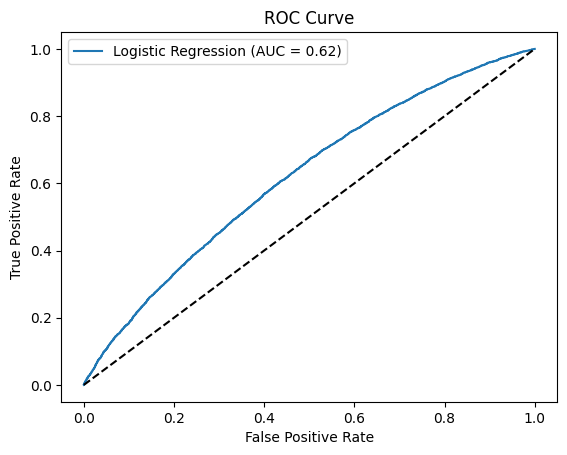

Accuracy: 0.58
F1 Score: 0.59
AUC: 0.62


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load or generate synthetic data
# Assuming synthetic_bp_data from previous script
# Columns: 'SBP', 'DBP', 'Sex' where 'Sex' is the binary target label (1 = Male, 0 = Female)

# Step 1: Data Splitting
train_data, test_data = train_test_split(synthetic_bp_data, test_size=0.2, random_state=0)
X_train = train_data[['SBP', 'DBP']]
y_train = train_data['Sex']
X_test = test_data[['SBP', 'DBP']]
y_test = test_data['Sex']

# Step 2: Model Training
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Step 3: Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Manual ROC curve plotting
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.savefig('images/ROC.png')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")


### Analysis 
### i. Classifier Performance with Different Male/Female Ratios
- **Balanced Ratio (50:50)**: The classifier shows modest performance (AUC 0.62), suggesting that SBP and DBP alone may not strongly differentiate sexes.
- **Imbalanced Ratios**: With more males (e.g., 70:30), the classifier would likely favor predicting males, leading to lower recall for females. Similarly, a higher female ratio would bias predictions toward females, reducing performance for males.

### ii. Potential Biases with Varying Prevalences
1. **Class Imbalance Bias**: An imbalanced dataset biases the model towards the majority class, lowering recall for the minority class. For example, in an 80:20 male-to-female dataset, the classifier may favor "male" predictions.
2. **Metric Bias**: Accuracy becomes misleading with imbalanced data; F1 score and AUC provide better insights into balanced performance.
3. **Real-world Impact**: In practice, a biased model may perform poorly on the underrepresented group, which is critical to avoid in medical contexts.


### Discussion

1. **Importance of Balanced Datasets in Healthcare**:
   - Balanced datasets help models perform effectively across all groups, which is essential in healthcare to prevent biases that might result in misdiagnoses or unequal treatment.

2. **Implications and Challenges with Real-world Imbalanced Datasets**:
   - In real-world data, some groups (e.g., males or specific age ranges) may be overrepresented, causing models to underperform on minority groups. This imbalance can lead to biased predictions and poor generalization in underrepresented groups.

3. **Strategies to Address Imbalance**:
   - **Resampling**: Oversample the minority class or undersample the majority class to balance the dataset.
   - **Class Weights**: Adjust model class weights to emphasize the minority class.
   - **Use of Robust Metrics**: Evaluate models with F1 scores and AUC rather than accuracy to better understand performance across classes.
   
These methods can help mitigate bias, making predictions fairer and more accurate across groups.

Accuracy: 0.58
F1 Score: 0.59
AUC: 0.62


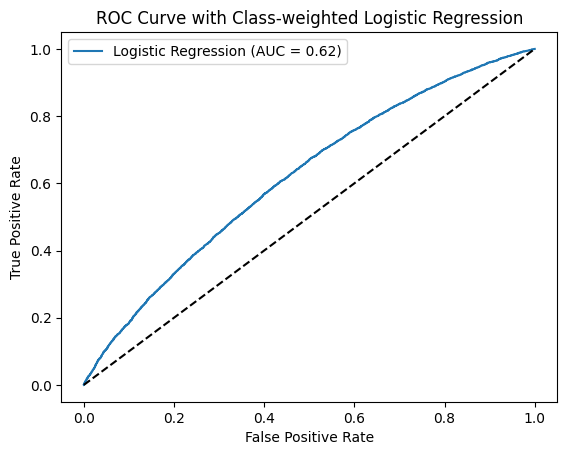

In [5]:
# Train logistic regression with class weights to mitigate bias
classifier = LogisticRegression(class_weight='balanced')  # 'balanced' adjusts weights inversely to class frequency
classifier.fit(X_train, y_train)

# Evaluate the model
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Class-weighted Logistic Regression")
plt.legend(loc="best")
plt.show()



### Explain the reasoning behind the chosen method.
To systematically reduce sex bias, we can modify the training strategy by adjusting the loss function to incorporate **class weights**. This method assigns a higher weight to the minority class (whichever has fewer samples), making the model penalize errors on the minority class more heavily during training.

